In [1]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, LSTM, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import pandas as pd
import os
import numpy as np

In [3]:
#Create a function to save on code
def getfilelistDF(location):
    allscripts = os.listdir(location)
    allscripts
    filename = ''
    dfscript = pd.DataFrame(columns = ['Label', 'Text', 'filename'])

    for script in allscripts:
        if script[-4:] == '.txt':
            filename = script
            raw_text = open(location + filename, 'r', encoding='utf-8').read()
            #raw_text = raw_text.lower()
            dfscript = dfscript.append({'Label':filename[0], 'Text':raw_text, 'filename':filename}, ignore_index=True)
    return dfscript

In [4]:
#Get training data from 2 directories
dfscript1 = getfilelistDF("./FilmScripts/Scripts/")
dfscript2 = getfilelistDF("./FilmScripts/FullScripts/")

#Concat and reindex
dfscript = pd.concat([dfscript1, dfscript2])
dfscript = dfscript.reset_index(drop=True)

#Get the testing data
dfscriptTesting =  getfilelistDF("./FilmScripts/FullScripts/Test/")


C:\Users\rolester\AppData\Local\Temp\ipykernel_25020\2511290568.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfscript = dfscript.append({'Label':filename[0], 'Text':raw_text, 'filename':filename}, ignore_index=True)
C:\Users\rolester\AppData\Local\Temp\ipykernel_25020\2511290568.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfscript = dfscript.append({'Label':filename[0], 'Text':raw_text, 'filename':filename}, ignore_index=True)
C:\Users\rolester\AppData\Local\Temp\ipykernel_25020\2511290568.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfscript = dfscript.append({'Label':filename[0], 'Text':raw_text, 'filename':filename}, ignore_index=True)
C:\Users\rolester\AppData\Local\Temp\ipykernel_25020\25112905

In [5]:
#Remove stopwords and create a tfidf
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

x_train = pd.DataFrame()

#Remove stopwords and create a tfidf
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

x_train = pd.DataFrame()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
x_train['Text'] = dfscript['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#print(test)

num_labels = 5
vocab_size = 15000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dfscript['Text'])
 
x_train = tokenizer.texts_to_matrix(x_train['Text'], mode='tfidf')
x_test = tokenizer.texts_to_matrix(dfscriptTesting['Text'], mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(dfscript['Label'])
y_train = encoder.transform(dfscript['Label'])
y_test =  encoder.transform(dfscriptTesting['Label'])

from numpy.random import seed
np.random.seed(723970371)

model = Sequential()
model.add(Dense(1024, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

optimizer = Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │    15,361,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         5,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,614,149 (78.64 MB)

 Trainable params: 20,614,149 (78.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=400,
                    verbose=0,
                    validation_split=0.1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


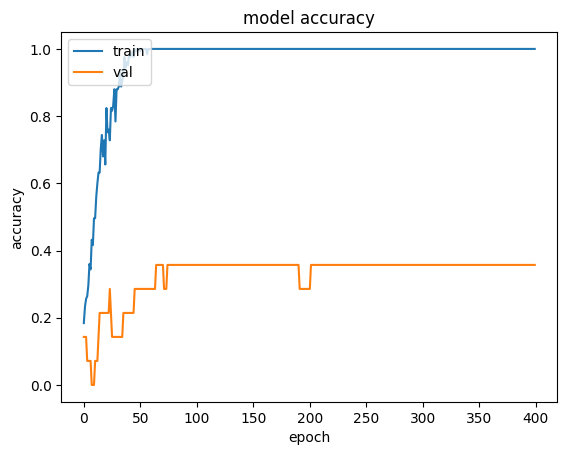

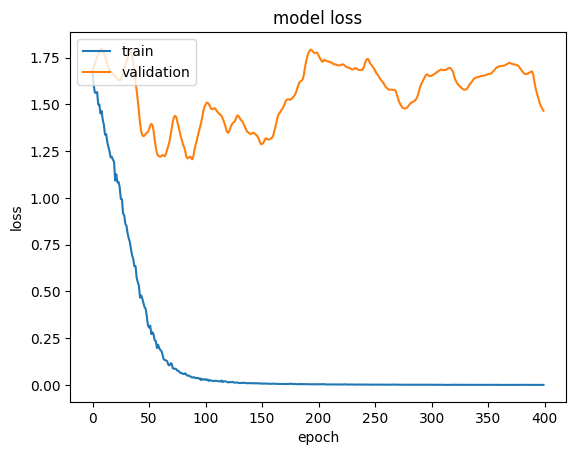

accuracy testing data = 0.8


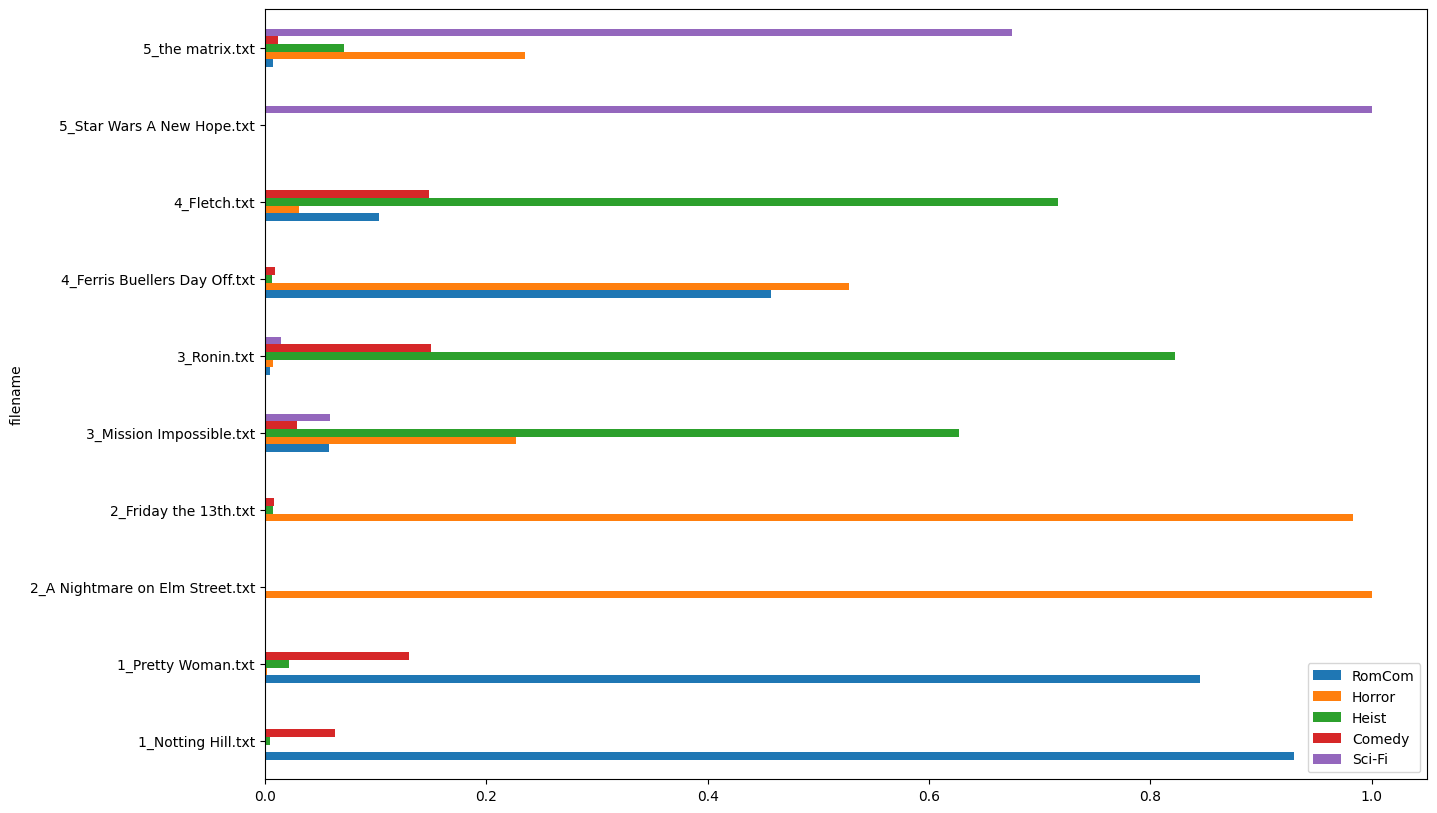

,RomCom,Horror,Heist,Comedy,Sci-Fi,filename
0,0.92962,0.00137,0.00508,0.06376,0.00018,1_Notting Hill.txt
1,0.84461,0.00212,0.02220,0.13063,0.00043,1_Pretty Woman.txt
2,0.00000,1.00000,0.00000,0.00000,0.00000,2_A Nightmare on Elm Street.txt
3,0.00138,0.98258,0.00711,0.00858,0.00035,2_Friday the 13th.txt
4,0.05806,0.22658,0.62730,0.02892,0.05913,3_Mission Impossible.txt
5,0.00508,0.00749,0.82248,0.15050,0.01445,3_Ronin.txt
6,0.45688,0.52726,0.00629,0.00895,0.00062,4_Ferris Buellers Day Off.txt
7,0.10337,0.03121,0.71650,0.14823,0.00069,4_Fletch.txt
8,0.00000,0.00000,0.00000,0.00000,1.00000,5_Star Wars A New Hope.txt
9,0.00767,0.23464,0.07134,0.01178,0.67457,5_the matrix.txt


In [7]:
#prediction = model.predict(np.array([x_test]))
# use model.predict to get probabilities (predict_proba is not available on Keras Sequential)
prediction = model.predict(x_test)

# create dataframe with named columns for readability
dfres = pd.DataFrame(prediction, columns=['RomCom', 'Horror', 'Heist', 'Comedy', 'Sci-Fi'])
dfres['filename'] = dfscriptTesting['filename']

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# model.predict_classes is deprecated/removed; use argmax over predicted probabilities
predictionlabels = np.argmax(prediction, axis=1)
#print('accuracy testing data = ' + str(np.mean((predictionlabels+1)[0] == dfscriptTesting['Label'].to_numpy(dtype=int))))
print('accuracy testing data = ' + str(np.mean((predictionlabels + 1) == dfscriptTesting['Label'].to_numpy(dtype=int))))

dfres.plot.barh(x='filename', figsize=(15,10))
#run.log_image("results graph", path=None, plot=plt)
plt.show()

dfres.round(5)


In [9]:
with open('./FilmScripts/FullScripts/Test/3_Mission Impossible.txt', 'r', encoding='utf-8') as file:
    script = file.read()


import numpy as np
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider
import json

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-5-mini",
    #temperature=0.7,
    reasoning={"effort": "medium"},
    input="""These are th4e categories 'RomCom', 'Horror', 'Heist', 'Comedy', 'Sci-Fi'. I want you to tell me how accurate each of these categories are for this script. Give a percentage for each one. SCRIPT:   """ + script,
)

print(response.output_text)

print(response.usage)



Here’s a quick accuracy estimate for how well each category fits this script (each percentage is independent):

- RomCom — 5%  
  Very slight romantic subplot (Ethan/Claire) but no comedic tone or rom-com structure.

- Horror — 5%  
  Contains violence and deaths, but the intent and tone are thriller/espionage, not horror.

- Heist — 85%  
  Core of the material is an elaborate theft/infiltration: team planning, disguise/gadgets, timed moves, break‑ins and a high‑stakes payoff — classic heist mechanics within a spy context.

- Comedy — 10%  
  Occasional witty banter and darkly humorous beats, but humor is minor and not the driving genre.

- Sci‑Fi — 5%  
  Uses advanced gadgets and tech, but everything is grounded in near‑realistic spy gear rather than speculative science‑fiction.
ResponseUsage(input_tokens=37960, input_tokens_details=InputTokensDetails(cached_tokens=0), output_tokens=644, output_tokens_details=OutputTokensDetails(reasoning_tokens=448), total_tokens=38604)
